In [90]:
# 导入需要的包以及解决中文乱码的问题
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
import pandas as pd 
import numpy as np

second_data = pd.read_csv(r'./datas/hangzhou/secondHand.csv',encoding="gbk")
columns = ['套数(套)', '总面积（平方米）', '住宅套数(套)', '住宅面积(平方米)']


bussiness_data = pd.read_csv(r'./datas/hangzhou/bussiness.csv',encoding="gbk")
types = ['住宅', '商业用房', '写字楼', '其它', '合计']
columns2 = ['成交套数', '成交面积']

rm_weekend = True  # 是否删除周末数据
show_polyfit = True  # 曲线拟合

In [91]:
from datetime import datetime

def is_workday(day_str, separator=""):
    """
    if a day is workday
    :param day_str: string of a day
    :param separator: separator of year, month and day, default is empty
    :return: True: is workday; False: not workday
    """
    spec = "%Y" + separator + "%m" + separator + "%d"
    day = datetime.strptime(day_str, spec).date()
    # Monday == 0 ... Sunday == 6
    if day.weekday() in [0, 1, 2, 3, 4]:
        return True
    else:
        return False


def is_weekend(day_str, separator=""):
    """
    if a day is weekend
    :param day_str: string of a day
    :param separator: separator of year, month and day, default is empty
    :return: True: is weekend; False: not weekend
    """
    spec = "%Y" + separator + "%m" + separator + "%d"
    day = datetime.strptime(day_str, spec).date()
    # Monday == 0 ... Sunday == 6
    if day.weekday() in [5, 6]:
        return True
    else:
        return False

In [92]:
second_data['is_workday']=second_data['日期'].astype(str).map(lambda x:is_workday(x))
bussiness_data['is_workday']=bussiness_data['日期'].astype(str).map(lambda x:is_workday(x))
print(second_data)

    套数(套)   总面积（平方米）  住宅套数(套)  住宅面积(平方米)        日期  is_workday
0     381   54650.51      284   37176.67  20230530        True
1     376   51177.26      303   37639.39  20230531        True
2     230   31069.52      176   22056.99  20230601        True
3     369   49883.43      337   46662.11  20230602        True
4      80   10404.03       70    9718.84  20230604       False
5     381   48160.13      316   42380.90  20230605        True
6     298   48343.80      230   34447.20  20230606        True
7     386   48877.84      304   40448.23  20230607        True
8     253   31762.30      210   27981.70  20230608        True
9     135   13497.13      127   12837.44  20230610       False
10     85    9037.05       77    8524.15  20230611       False
11    226   36619.39      151   17722.30  20230613        True
12    367   45463.48      300   35617.35  20230614        True
13    248   32280.80      225   27763.74  20230615        True
14    262   33717.44      225   28607.11  20230616     

In [93]:
def parse_type_data(data, type_key_word, type_names, not_zero_name=None, rm_weekend=True):
    region_data_list = []
    for region in type_names:
        region_data = data[data[type_key_word] == region]
        if not_zero_name is not None:
            region_data = region_data[region_data[not_zero_name] > 0]
        if rm_weekend:
            region_data.drop(region_data[region_data['is_workday'] == False].index, inplace=True)

        region_data_list.append(region_data)
    return region_data_list

def parse_data(data, not_zero_name=None, rm_weekend=True):
    if not_zero_name is not None:
        data = data[region_data[not_zero_name] > 0]
    if rm_weekend:
        data.drop(data[data['is_workday'] == False].index, inplace=True)
    return data

In [94]:
type_data_list = parse_type_data(bussiness_data, '房屋用途', types)
print(type_data_list[0])

    房屋用途  成交套数       成交面积        日期  is_workday
0     住宅   284   37176.67  20230530        True
5     住宅   303   37639.39  20230531        True
10    住宅   176   22056.99  20230601        True
15    住宅   337   46662.11  20230602        True
25    住宅   316   42380.90  20230605        True
30    住宅   230   34447.20  20230606        True
35    住宅   304   40448.23  20230607        True
40    住宅   210   27981.70  20230608        True
55    住宅   151   17722.30  20230613        True
60    住宅   300   35617.35  20230614        True
65    住宅   225   27763.74  20230615        True
70    住宅   225   28607.11  20230616        True
85    住宅   155   20736.56  20230619        True
90    住宅   183   26094.50  20230620        True
95    住宅   230   38070.18  20230621        True
100   住宅   155   29416.72  20230622        True
105   住宅   104   20902.54  20230623        True
115   住宅   590   91705.01  20230627        True
120   住宅   658  101449.43  20230628        True
125   住宅   596   89531.58  20230629     

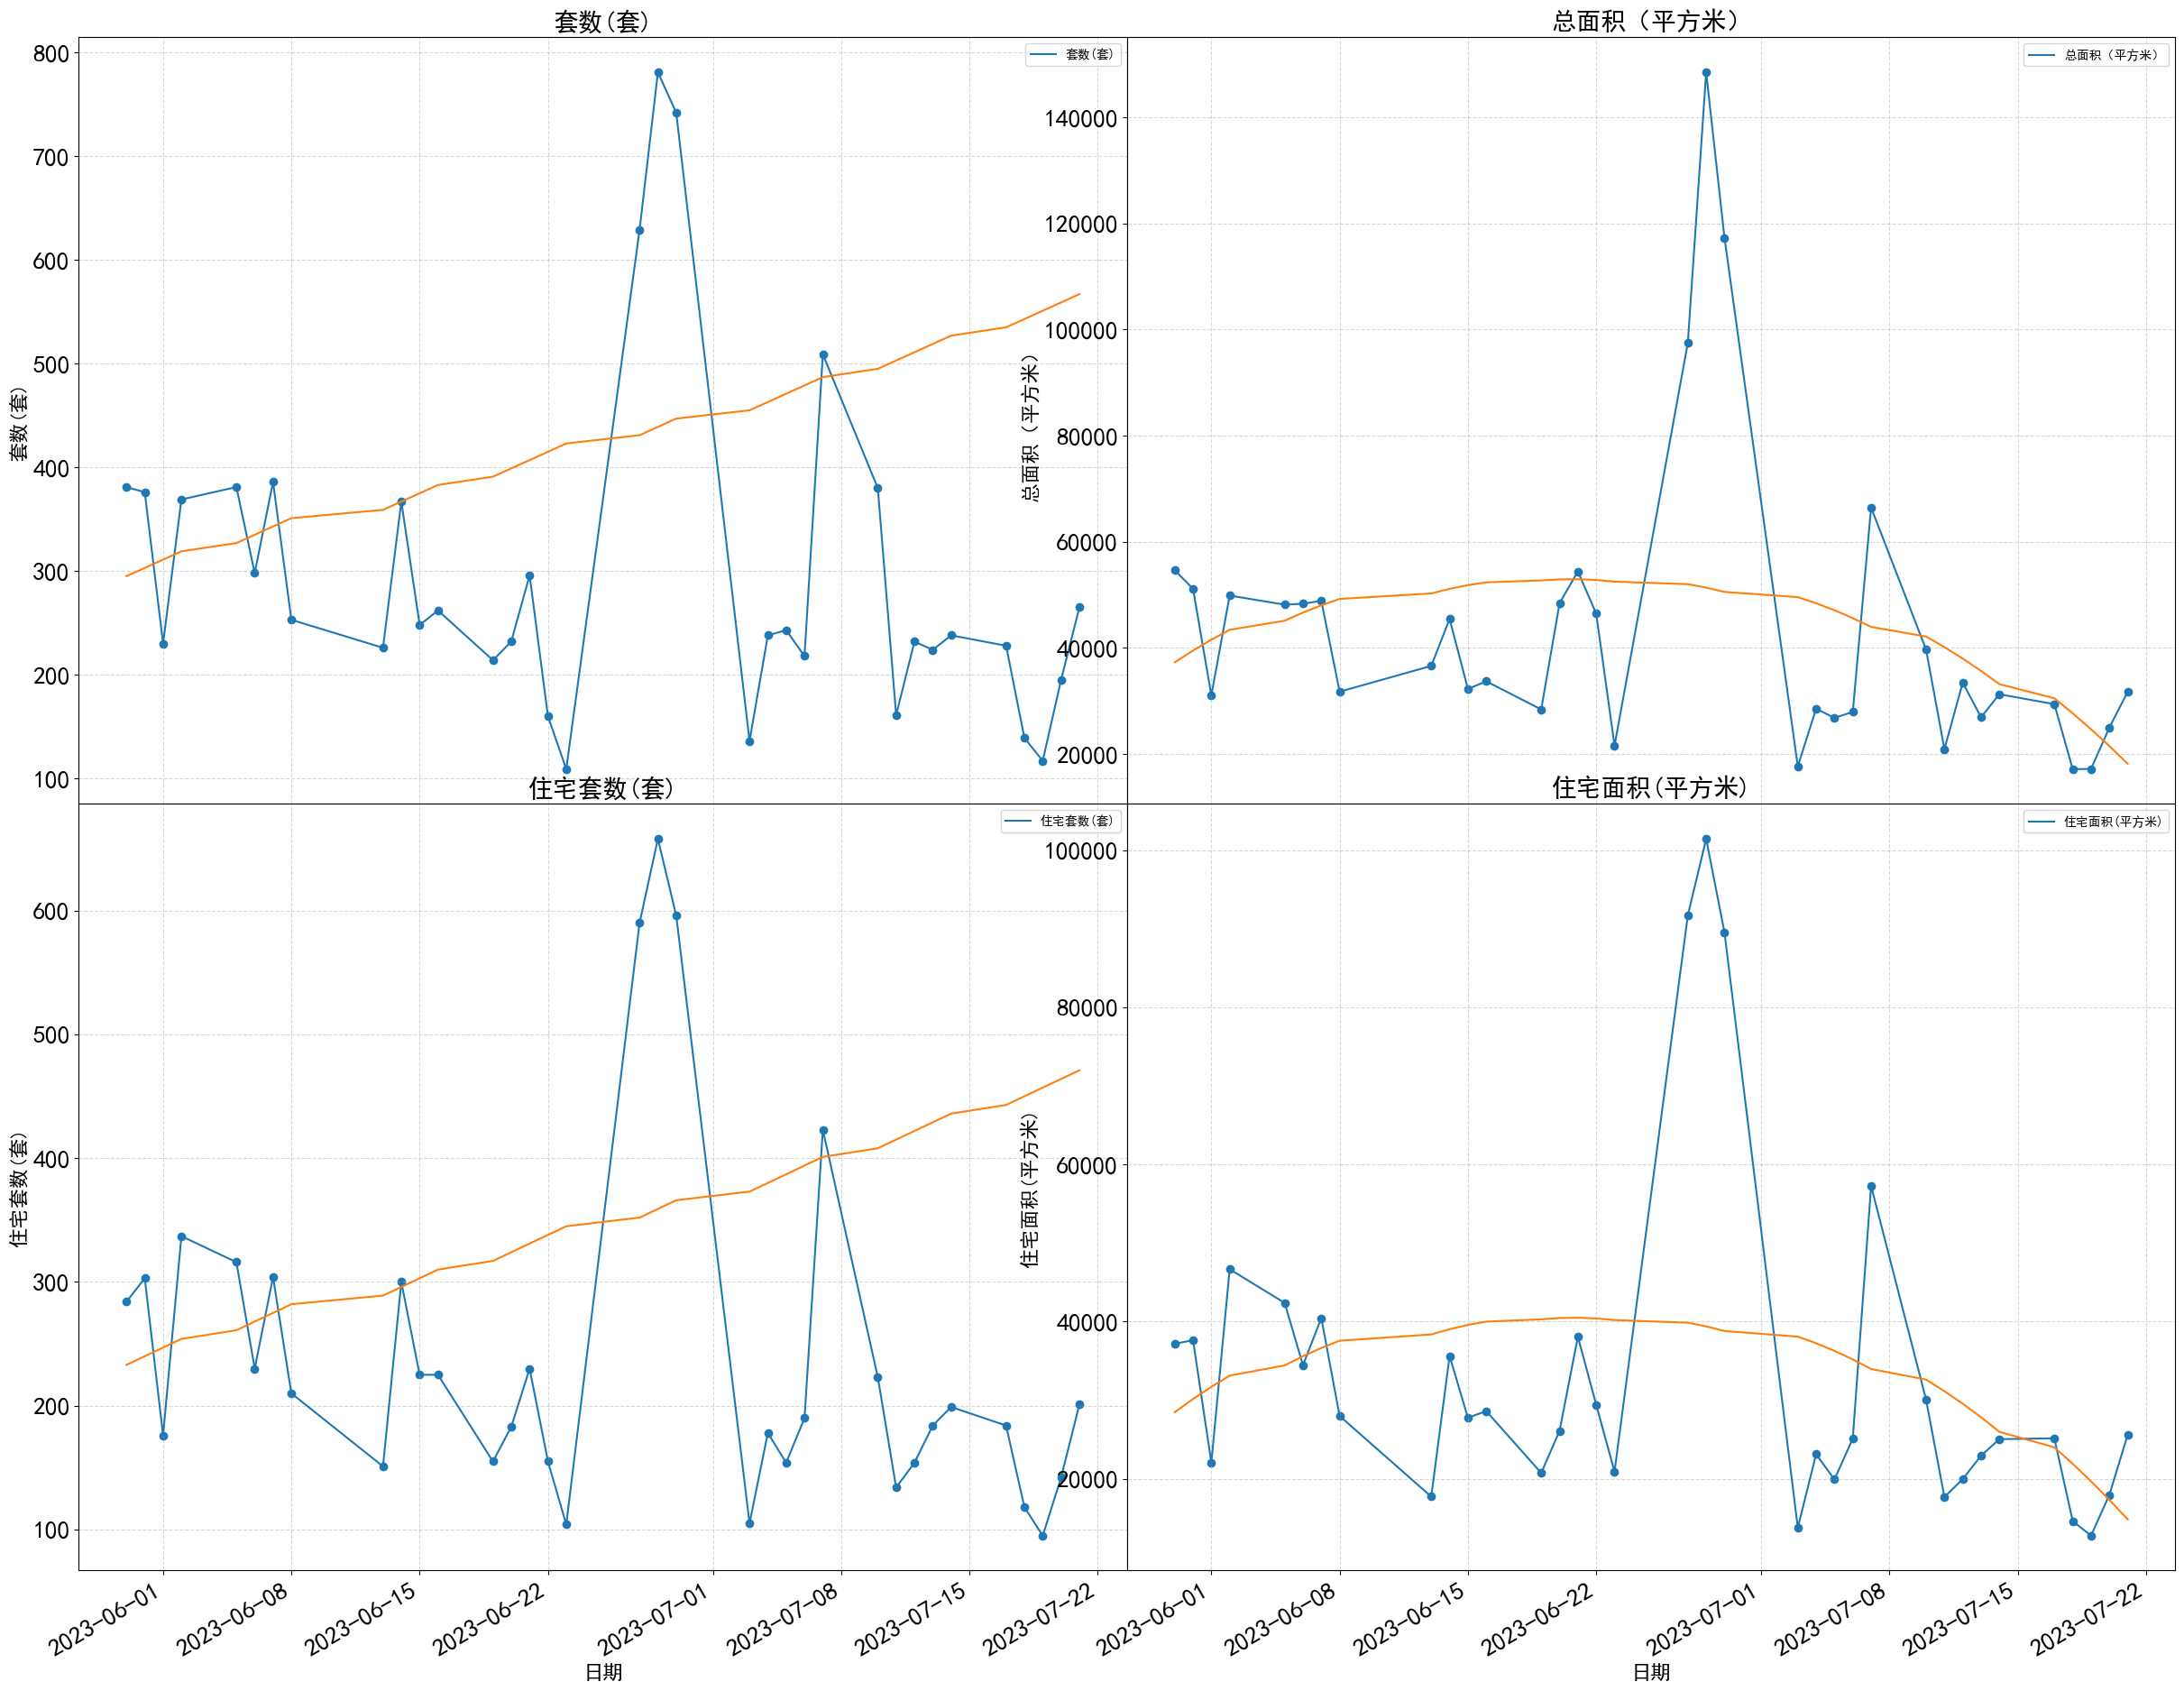

In [97]:
# 杭州 二手房 日数据

def draw_subplot(ax, date, column_data, column_name):
    ax.plot(date, column_data, label=column_name)
    ax.scatter(date, column_data)
    ax.set_title(column_name, fontdict={'size': 20})
    ax.set_ylabel(column_name, fontdict={'size': 16})

    ax.legend(loc='best')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlabel("日期", fontdict={'size': 16})

    if show_polyfit:
        # 绘制拟合曲线
        deg = 2
        poly = np.polyfit(np.linspace(1, len(date), len(date)), np.array(column_data).astype(int), deg=deg)
        y_value = np.polyval(poly.astype(int), np.linspace(1, len(date), len(date)))
        ax.plot(date, y_value)
        ax.tick_params(labelsize=20) #刻度字体大小

def show_lineplot(data, date, columns):
       
    fig, axes = plt.subplots(2, 2, figsize=(30, 25), dpi=100, sharex=True)

    k = 0;
    for i in range(2):
        for j in range(2):
            ax = axes[i, j];
            draw_subplot(ax, date, data[columns[k]], columns[k])
            k = k + 1;
    
    fig.autofmt_xdate()
    plt.subplots_adjust(wspace =0, hspace =0)#调整子图间距
    plt.tick_params(labelsize=20) #刻度字体大小
    plt.show()

    
type_data_list = parse_data(second_data, rm_weekend=rm_weekend)

date = type_data_list['日期']
date=pd.to_datetime(date, format='%Y%m%d')

show_lineplot(type_data_list, date, columns)

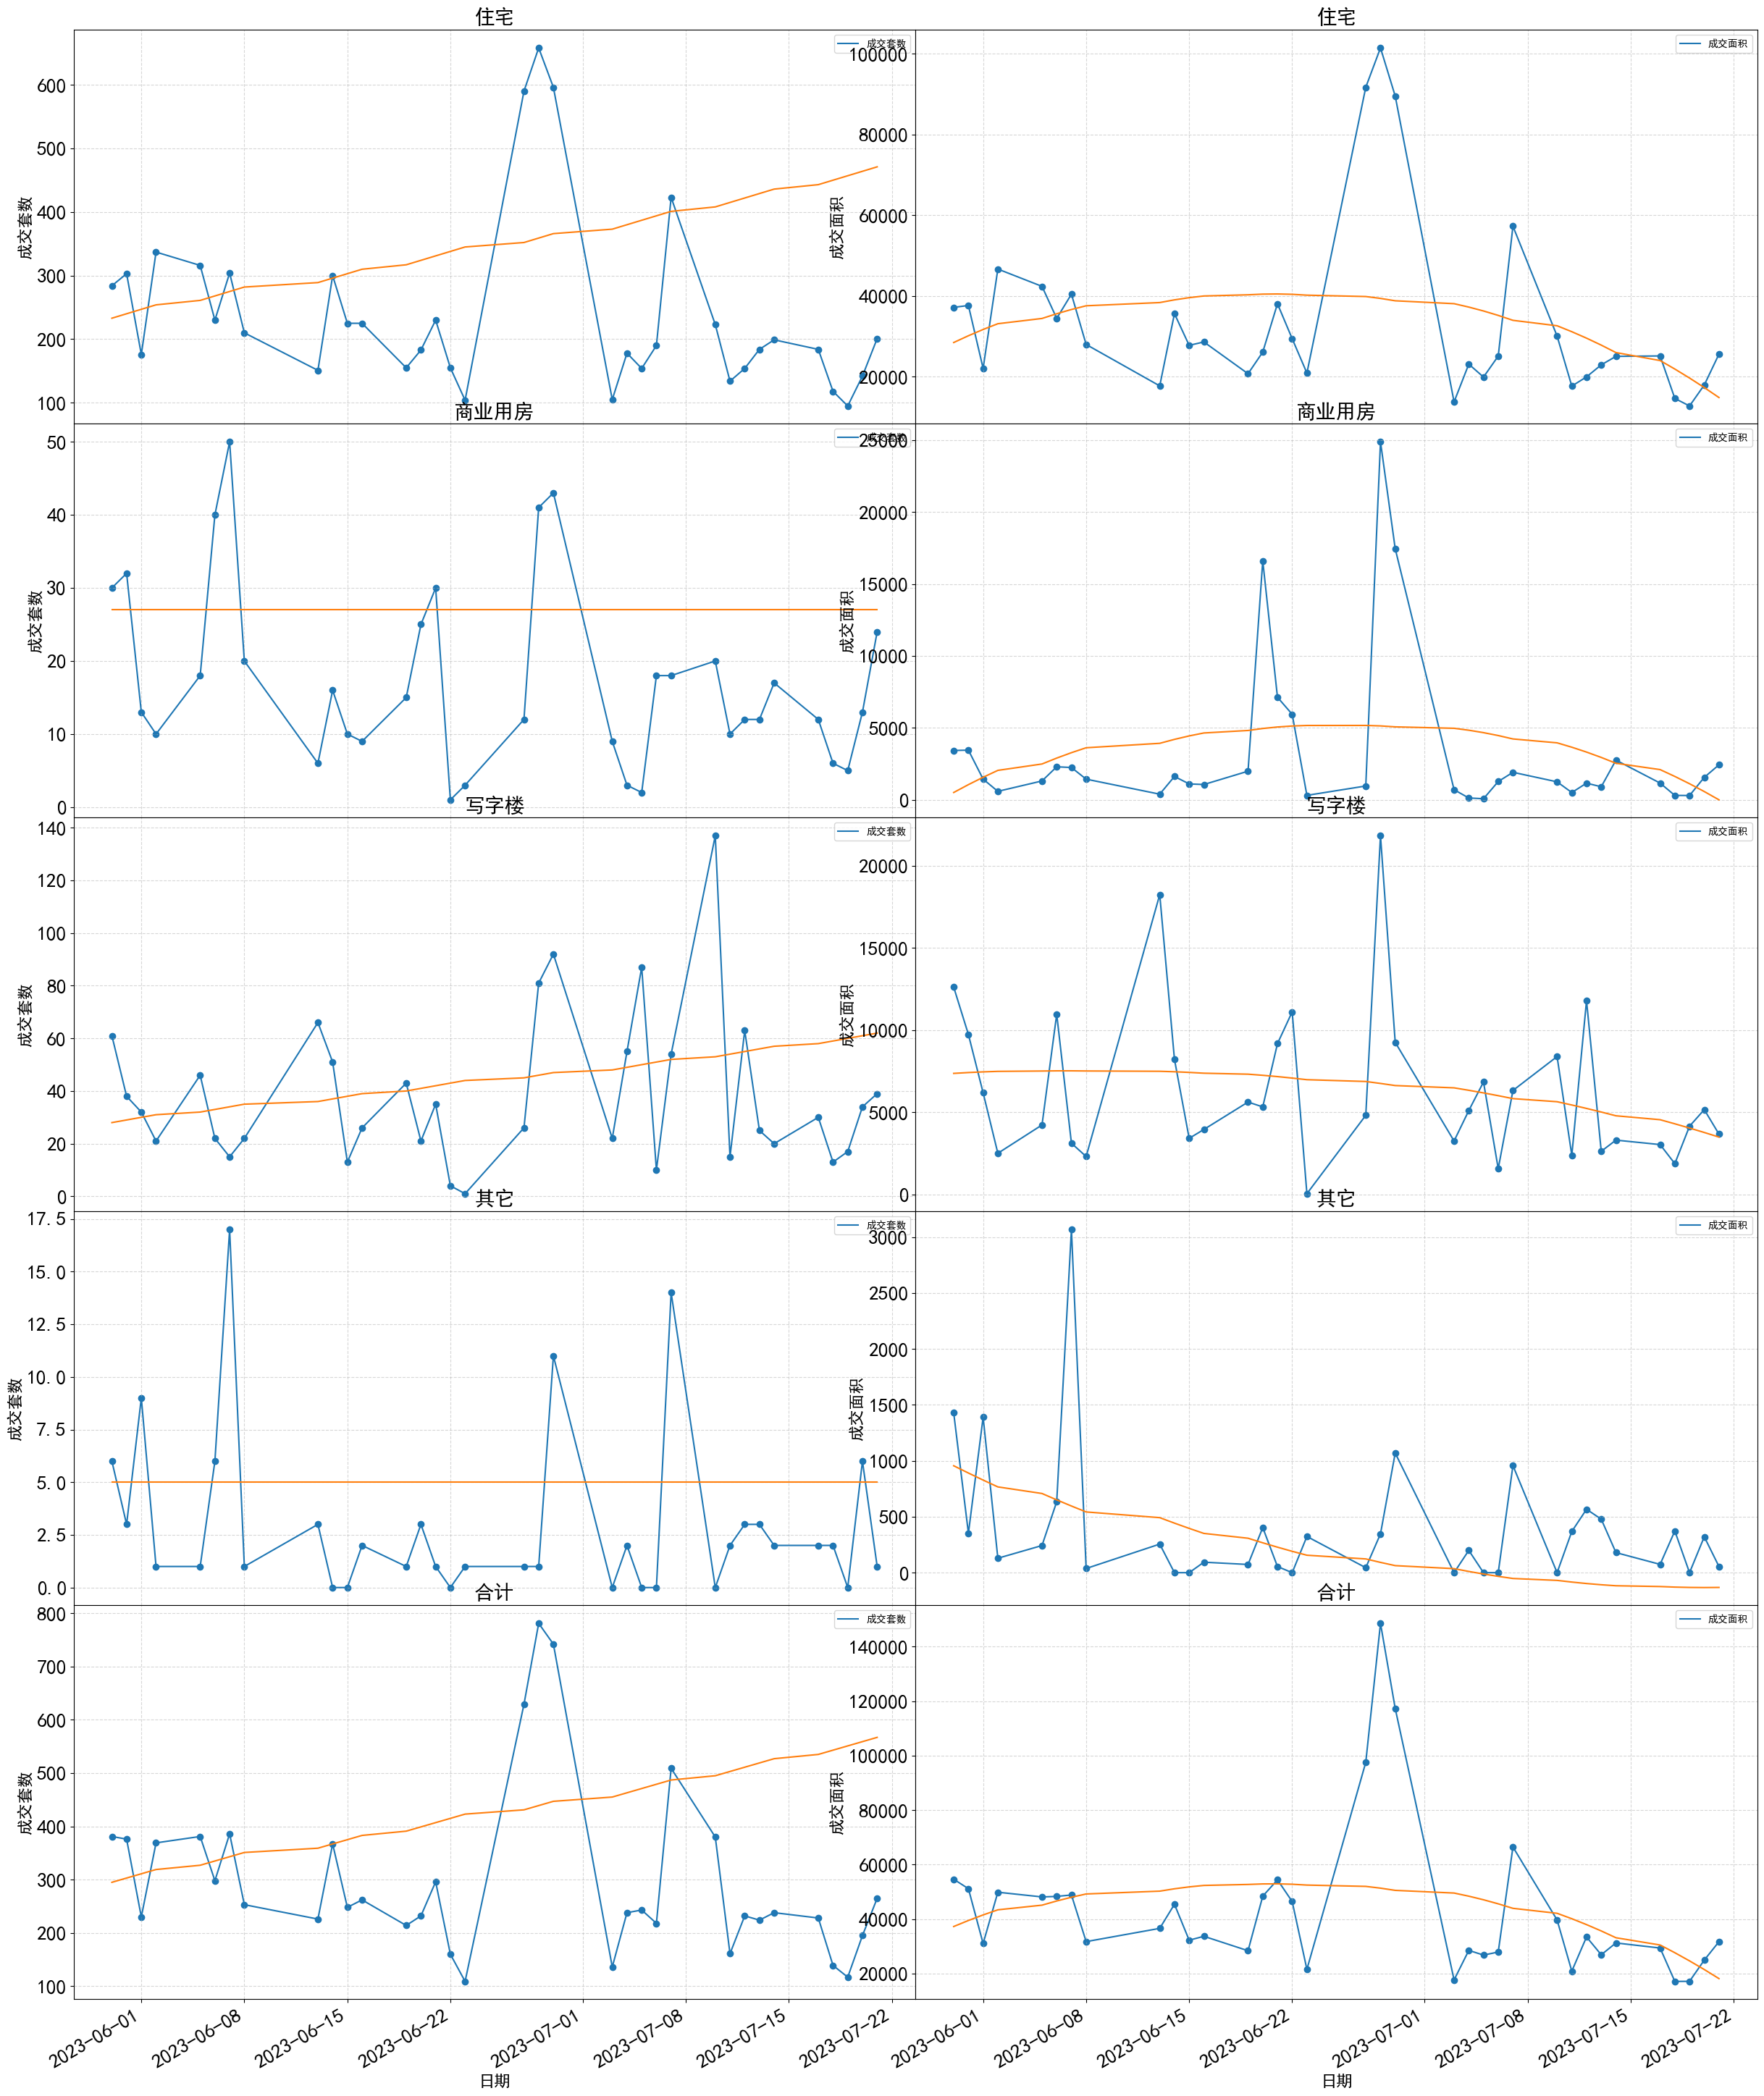

In [96]:
# 杭州 商品房 日数据
def show_lineplot(data, date, columns):

    def draw_subplot(ax, date, column_data, column_name, type_name):
        ax.plot(date, column_data, label=column_name)
        ax.scatter(date, column_data)
        ax.set_title(type_name, fontdict={'size': 20})
        ax.set_ylabel(column_name, fontdict={'size': 16})

        ax.legend(loc='best')
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.set_xlabel("日期", fontdict={'size': 16})

        if show_polyfit:
            # 绘制拟合曲线
            deg = 2
            poly = np.polyfit(np.linspace(1, len(date), len(date)), np.array(column_data).astype(int), deg=deg)
            y_value = np.polyval(poly.astype(int), np.linspace(1, len(date), len(date)))
            ax.plot(date, y_value)
            ax.tick_params(labelsize=20) #刻度字体大小

    fig,axes = plt.subplots(len(types), len(columns), figsize=(30, 40), dpi=100, sharex=True);

    for i, data_i in enumerate(data):
        for j, col_j in enumerate(columns):
            ax = axes[i, j];
            draw_subplot(ax, date, data_i[col_j], col_j, types[i])
        
    
    fig.autofmt_xdate()
    plt.subplots_adjust(wspace =0, hspace =0)#调整子图间距
    plt.show()

    
type_data_list = parse_type_data(bussiness_data, '房屋用途', types, rm_weekend=rm_weekend)

date = type_data_list[0]['日期']
date=pd.to_datetime(date, format='%Y%m%d')

show_lineplot(type_data_list, date, columns2)